In [7]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import confusion_matrix, classification_report

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [8]:
# Read the CSV file from the Resources folder into a Pandas DataFrame

df = pd.read_csv("../STARTER_CODE/Resources/lending_data.csv")

# Review the DataFrame
df.describe()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
count,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000
mean,9805.562577,7.292333,49221.949804,0.377318,3.826610,0.392308,19221.949804,0.032243
std,2093.223153,0.889495,8371.635077,0.081519,1.904426,0.582086,8371.635077,0.176646
min,5000.000000,5.250000,30000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8700.000000,6.825000,44800.000000,0.330357,3.000000,0.000000,14800.000000,0.000000
50%,9500.000000,7.172000,48100.000000,0.376299,4.000000,0.000000,18100.000000,0.000000
75%,10400.000000,7.528000,51400.000000,0.416342,4.000000,1.000000,21400.000000,0.000000
max,23800.000000,13.235000,105200.000000,0.714829,16.000000,3.000000,75200.000000,1.000000


In [9]:
df

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0
...,...,...,...,...,...,...,...,...
77531,19100.0,11.261,86600,0.653580,12,2,56600,1
77532,17700.0,10.662,80900,0.629172,11,2,50900,1
77533,17600.0,10.595,80300,0.626401,11,2,50300,1
77534,16300.0,10.068,75300,0.601594,10,2,45300,1


In [10]:
df["derogatory_marks"].value_counts()

derogatory_marks
0    50497
1    24174
2     2351
3      514
Name: count, dtype: int64

In [11]:
# what is the average num of accounts per derogratory_marks?
df.groupby("derogatory_marks")["num_of_accounts"].mean()

derogatory_marks
0     2.982692
1     4.651278
2    11.329647
3    13.632296
Name: num_of_accounts, dtype: float64

In [12]:
# what is the average interest rate per derogratory_marks?
df.groupby("derogatory_marks")["interest_rate"].mean()

derogatory_marks
0     6.883658
1     7.702575
2    10.835771
3    11.940261
Name: interest_rate, dtype: float64

In [13]:
# what is the average loan_status per derogratory_marks?
df.groupby("derogatory_marks")["loan_status"].mean()

derogatory_marks
0    0.000198
1    0.001448
2    0.854530
3    0.867704
Name: loan_status, dtype: float64

<Axes: >

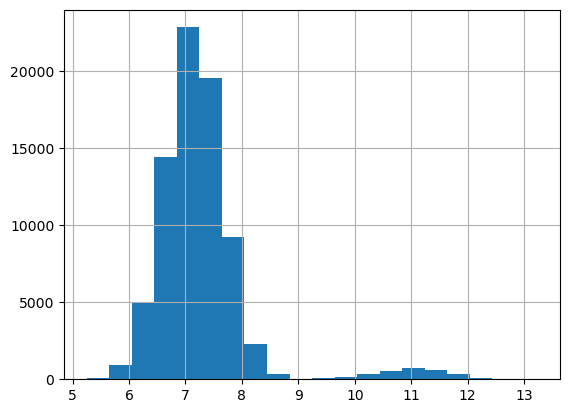

In [14]:
df.interest_rate.hist(bins=20)

In [15]:
df.loan_status.value_counts()

loan_status
0    75036
1     2500
Name: count, dtype: int64

### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [16]:
df.columns

Index(['loan_size', 'interest_rate', 'borrower_income', 'debt_to_income',
       'num_of_accounts', 'derogatory_marks', 'total_debt', 'loan_status'],
      dtype='object')

In [17]:
# Separate the data into labels and features

# Separate the y variable, the labels
Y_COLUMN = ['loan_status']
Y = df[Y_COLUMN]

# Separate the X variable, the features
X_COLUMN = ['loan_size', 'interest_rate', 'borrower_income', 'debt_to_income',
       'num_of_accounts', 'derogatory_marks', 'total_debt']
X = df[X_COLUMN]

In [18]:
# Review the y variable Series
Y

,loan_status
0,0
1,0
2,0
3,0
4,0
...,...
77531,1
77532,1
77533,1
77534,1


In [19]:
# Review the X variable DataFrame
X

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000
...,...,...,...,...,...,...,...
77531,19100.0,11.261,86600,0.653580,12,2,56600
77532,17700.0,10.662,80900,0.629172,11,2,50900
77533,17600.0,10.595,80300,0.626401,11,2,50300
77534,16300.0,10.068,75300,0.601594,10,2,45300


### Step 3: Split the data into training and testing datasets by using `train_test_split`.

In [20]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.10, random_state=1)

In [21]:
X_train

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
56666,9000.0,6.954,46000,0.347826,3,0,16000
52050,10700.0,7.688,52900,0.432892,5,1,22900
21398,10100.0,7.410,50300,0.403579,4,1,20300
4965,10100.0,7.437,50600,0.407115,4,1,20600
7739,8600.0,6.785,44500,0.325843,3,0,14500
...,...,...,...,...,...,...,...
20609,7200.0,6.177,38700,0.224806,1,0,8700
21440,10000.0,7.389,50100,0.401198,4,1,20100
73349,10200.0,7.463,50800,0.409449,4,1,20800
50057,11100.0,7.838,54400,0.448529,5,1,24400


---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [22]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
model = LogisticRegression(random_state=1)

# Fit the model using training data
model.fit(X_train, y_train.values.ravel())

LogisticRegression(random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [23]:
# Make a prediction using the testing data
y_predict = model.predict(X_test)

In [24]:
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Step 3: Evaluate the model’s performance by doing the following:

* Generate a confusion matrix.

* Print the classification report.

In [25]:
# Generate a confusion matrix for the model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

mat = confusion_matrix(y_test, y_predict)
print("Confusion Matrix")
print(mat)

Confusion Matrix
[[7439   38]
 [  20  257]]


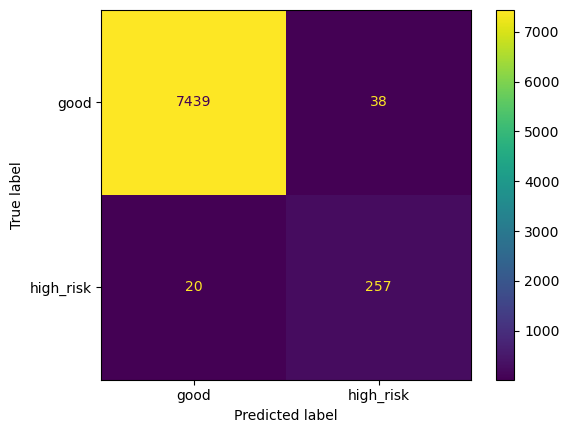

In [26]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predict,display_labels=['good', 'high_risk'])

In [27]:
# Print the classification report for the model
# question: How well does the logistic regression model predict 
# both the 0 (healthy loan) and 1 (high-risk loan) labels? (5 points)
from sklearn.metrics import classification_report
report = classification_report(y_test, y_predict)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      7477
           1       0.87      0.93      0.90       277

    accuracy                           0.99      7754
   macro avg       0.93      0.96      0.95      7754
weighted avg       0.99      0.99      0.99      7754



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** WRITE YOUR ANSWER HERE!

---